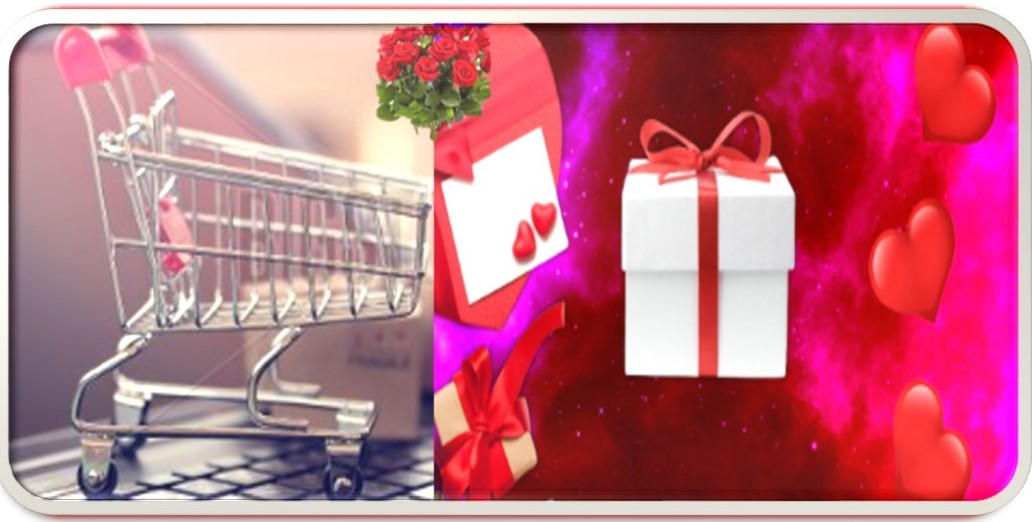

# **Introduction**

Valentine's Day embodies the spirit of love and affection. Valentine's Day heralds the midpoint of February when couples will exchange flowers and chocolates, head out for a romantic candlelit dinner and celebrate their enduring love. Nevertheless not every couple purchase these valentine gifts.

**This analysis seek to find out**
* People of which age are likely to purchase valentine gift
* Which gender is most likely to purchase valentine gift
* From which location (urban, rural, or semi urban) are people more likely to purchase valentine gift

* Peform Machine learning using K-Nearest Naibor (KNN) model


 ### About Dataset

*	'Customer ID' -This is customers unique identifier
*	'Gender' - Customer's gender, female or male
*	'Age', - Customer's age
*	'Location' - Where the customer is based either urban, rural, or semi urban
*	'Estimated Income' - The customer estimated inCome
*	'Purchased' -Shows if the customer purchased or not




## **Importing Libraries**

In [143]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split






## **Reading Dataset**

In [144]:
df=pd.read_csv("/content/Valentine_Gift_Purchase.csv")
df

,Customer ID,Gender,Age,Location,EstimatedIncome,Purchased
0,CID00211,Male,19.0,Rural,22000.0,0
1,CID00212,Male,35.0,Semi Arban,20000.0,0
2,CID00213,Female,26.0,Arban,36000.0,0
3,CID00214,Female,27.0,Rural,57000.0,0
4,CID00215,Male,19.0,Rural,76000.0,0
...,...,...,...,...,...,...
415,CID00623,Male,46.0,Semi Arban,41000.0,0
416,CID00624,Female,51.0,Semi Arban,23000.0,0
417,CID00625,Male,50.0,Rural,20000.0,0
418,CID00626,Male,36.0,Rural,33000.0,1


## **Data Preprossecing**

In [145]:
# dataset shape
df.shape

(420, 6)

In [146]:
# dataset infromation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer ID      420 non-null    object 
 1   Gender           420 non-null    object 
 2   Age              413 non-null    float64
 3   Location         415 non-null    object 
 4   EstimatedIncome  419 non-null    float64
 5   Purchased        420 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 19.8+ KB


### Checking for null values

In [147]:
#checking for null values
df.isnull().sum()

Customer ID        0
Gender             0
Age                7
Location           5
EstimatedIncome    1
Purchased          0
dtype: int64

* The dataset contains missing values

In [148]:
# Deleting the 'EstimatedIcome'  missing value
df.dropna(subset=["EstimatedIncome"], inplace=True)

#checking for nulls
df["EstimatedIncome"].isnull().sum()

0

In [149]:
#impute the 'Age' missing values with median
column_name="Age"
median_value=df[column_name].median()
df["Age"].fillna(median_value, inplace=True)

#Check for null
df["Age"].isnull().sum()

0

In [150]:
# Imputing the 'Location' missing values with mode
mode_value=df["Location"].mode().iloc[0]
df["Location"].fillna(mode_value, inplace=True)

#check for null
df["Location"].isnull().sum()

0

In [151]:
df.isnull().sum()

Customer ID        0
Gender             0
Age                0
Location           0
EstimatedIncome    0
Purchased          0
dtype: int64

### Identifying the Duplicates

In [152]:
df.duplicated().sum()

2

* There are two duplicates in the dataset

In [153]:
#Displaying the duplicated rows
duprows = df[df.duplicated(keep=False)]
duprows

,Customer ID,Gender,Age,Location,EstimatedIncome,Purchased
18,CID00228,Male,45.0,Arban,26000.0,1
19,CID00228,Male,45.0,Arban,26000.0,1
20,CID00229,Male,46.0,Arban,28000.0,1
21,CID00229,Male,46.0,Arban,28000.0,1


In [154]:
# Removing the diplicates
df.drop_duplicates(keep='first', inplace=True )

In [155]:
#checking if there duplicates anymore
duprows = df[df.duplicated(keep=False)]
duprows

,Customer ID,Gender,Age,Location,EstimatedIncome,Purchased


In [156]:
#Exploring the statistics metrics
df.describe().round(2).style.format(precision=2).background_gradient(cmap="Reds")

,Age,EstimatedIncome,Purchased
count,417.00,417.00,417.00
mean,38.12,69028.78,0.56
std,10.50,33863.40,0.50
min,18.00,15000.00,0.00
25%,30.00,43000.00,0.00
50%,37.00,68000.00,1.00
75%,46.00,87000.00,1.00
max,60.00,150000.00,1.00


# **Exploratory Data Analysis (EDA)**

In [157]:
# Displaying the columns
df.columns

Index(['Customer ID', 'Gender', 'Age', 'Location', 'EstimatedIncome',
       'Purchased'],
      dtype='object')

## How is customer gender distribution?

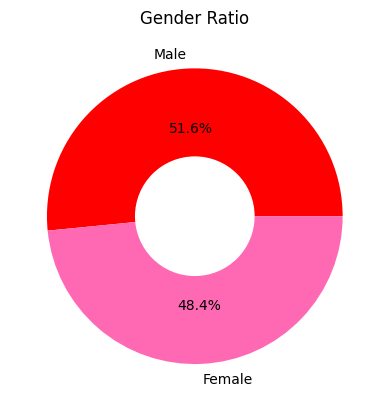

In [158]:
Gender=df['Gender'].value_counts()
#create a pie chart
plt.pie(Gender.values, labels=Gender.index, colors=["red", "hotpink"], autopct='%1.1f%%')
plt.title("Gender Ratio")
my_circle=plt.Circle((0,0), 0.4, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

* The male customer ratio is slightly higher compared to the female ratio

## Which gender has the highest salary?

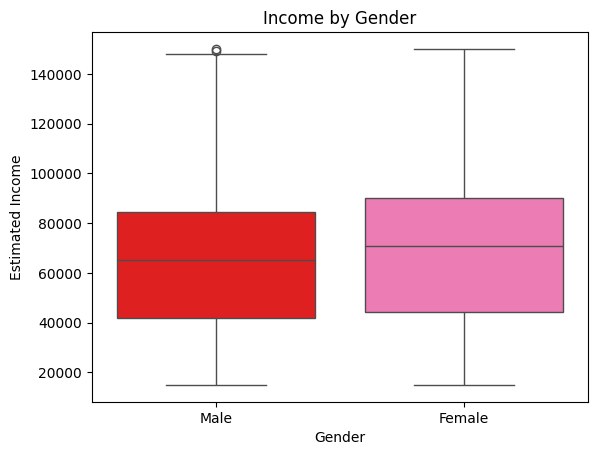

In [159]:
category_column="Gender"
numerical_column="EstimatedIncome"

sns.boxplot(x=category_column, y=numerical_column, hue="Gender", legend=False, data=df, palette=["red", "hotpink"])
plt.title("Income by Gender")
plt.xlabel("Gender")
plt.ylabel("Estimated Income")


plt.show()

* The Female gender is seen to have higher salary as compared with the male counterpart

## How is the valentine gift purchasing habit in ralation to age and salary?

* 1=>> Purchsed
* 0=>> Not Purchased

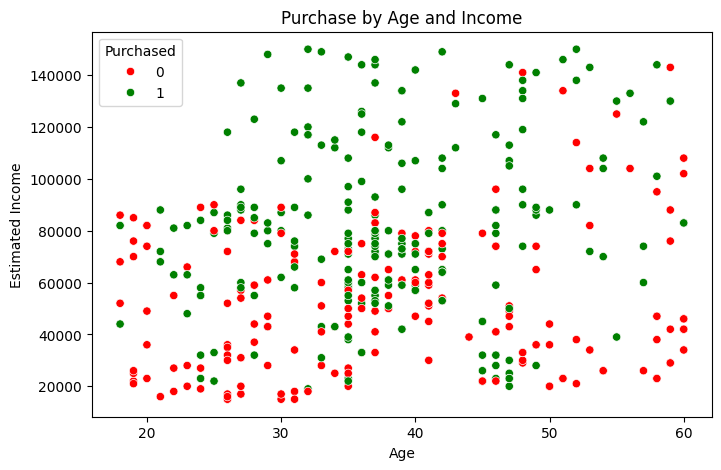

In [160]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Age", y="EstimatedIncome", hue="Purchased", palette=["red", "green"], data=df)
plt.title("Purchase by Age and Income")
plt.xlabel('Age')
plt.ylabel('Estimated Income')
plt.show()


* It is notable that people with high salary has a high valentine gift purchasing habit
* The purchasing probability is high between the age 30 and 50
* Most young people seem to have low salary hence low purchasing habit

## How is the purchasing habit based on the location?


* 1=>> Purchsed
* 0=>> Not Purchased

Text(0, 0.5, 'Count')

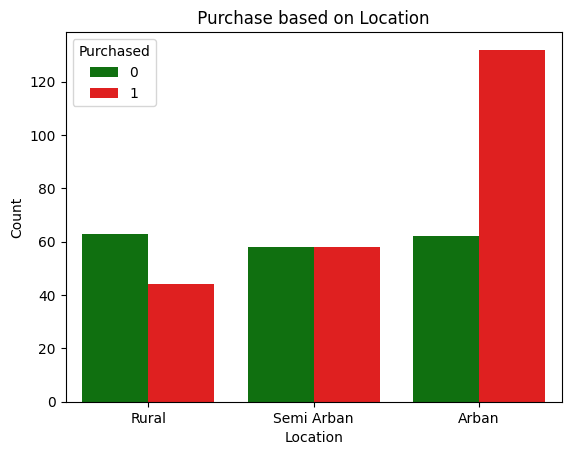

In [161]:
sns.countplot(x = "Location",  hue="Purchased",  palette=["green", "red"], data = df)
plt.title(" Purchase based on Location ")
plt.xlabel("Location")
plt.ylabel("Count")

* It is nortable that people in Arban are more likely to purchase valentine gifts as comapred to Rural and Semi Arban.
* Rural people has a low valentine gift purchasing habit

## Which gender has a high habit of purchsing valentine gift?



<ipython-input-162-80ba0b96eda2>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "Gender",  y="Purchased",    palette=["red", "hotpink"], data = df)


Text(0, 0.5, 'Count')

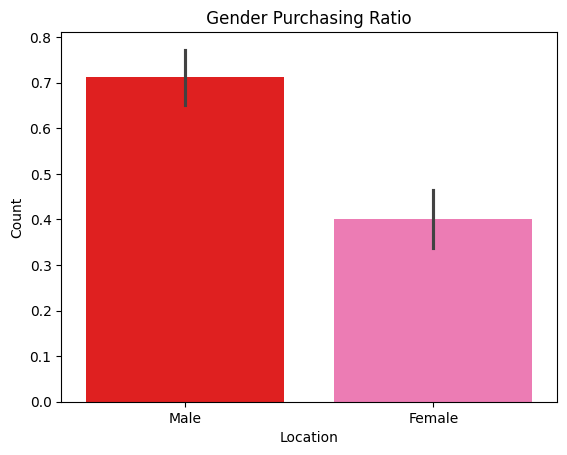

In [162]:
sns.barplot(x = "Gender",  y="Purchased",    palette=["red", "hotpink"], data = df)
plt.title(" Gender Purchasing Ratio ")
plt.xlabel("Location")
plt.ylabel("Count")

* From the analysis, it observed that Male are more likely to purchase valentine gifts than the female.

# Analysis Findings









1.   Female are receiving higher salary than male. However, the valentine purchaising rate for female is low as compared to that of male.
2. The urban people has high habit of buying valentine gifts as compared to rula and semi urban.  
3. Valentine gift is mostly purchsed by people of age between 30 to 50
3. The purchasing rate is also afected by income as it can be observed that people with high salary are more likely to purchase the valentine gift.






# Recommedation

* The salespersons may be requred to target the urban people for valentine gifts
* Focus may also be consentarted toward people of middle age
* Persons with high salary may also be considered a target
* Much focus may also be directed toward getting more male customers

# **Machine Learning**






## K-Nearest Naibor (KNN)

In [163]:
X = df.iloc[:, [2, 4]].values
y = df.iloc[:, -1].values



In [164]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [165]:
##Feature scaling-- standadization
from sklearn.preprocessing import StandardScaler
fs=StandardScaler()
X_train = fs.fit_transform(X_train)
X_test=fs.transform(X_test)

In [171]:
# Training the K-NN model on the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier= KNeighborsClassifier(n_neighbors=7, metric="minkowski", p=2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [172]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

### Model Accuracy Evaluation

In [173]:
# importing evaluation metrics
from sklearn.metrics import confusion_matrix, recall_score,  f1_score

#metrics
r_s=recall_score(y_test, y_pred)
print("The Recall Score is:",   r_s)
f1=f1_score(y_test, y_pred)
print("The F1 Score is:",   f1)
cm = confusion_matrix(y_test, y_pred)
print("The Confusion Matrix is:",   cm)


The Recall Score is: 0.6904761904761905
The F1 Score is: 0.651685393258427
The Confusion Matrix is: [[24 18]
 [13 29]]


### Visualizaing the training Results

In [174]:
from matplotlib.colors import ListedColormap


<ipython-input-175-d088d7351567>:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


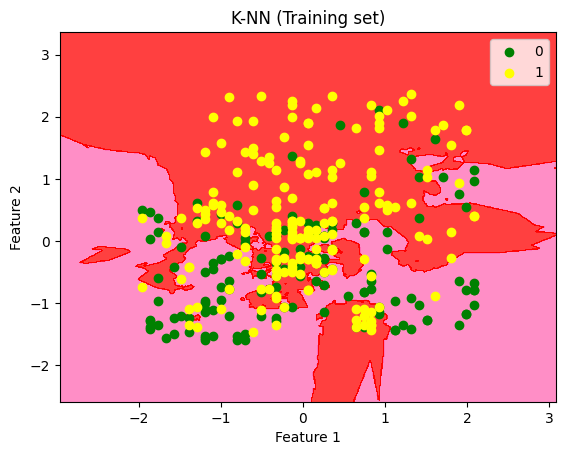

In [175]:
# Visualizing
X_set, y_set = X_train, y_train
X1, X2= np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))



plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('hotpink', 'red')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('green', 'yellow'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

